**แรงเนื่องจากประจุ 2 ตัว**

In [19]:
import numpy as np
from numpy.linalg import norm
from scipy.constants import pi, epsilon_0

In [43]:
Q1 = 10e-6
Q2 = 25e-6

In [44]:
r1 = np.array([3, 4, 5]) * 1e-2
r2 = np.array([-1, 2, -3]) * 1e-2

In [45]:
R = r1 - r2
R

array([0.04, 0.02, 0.08])

In [46]:
norm(R)

0.0916515138991168

In [47]:
F1 = ((Q1 * Q2) / (4 * pi * epsilon_0)) * (R / norm(R)**3)
F1

array([116.74074943,  58.37037472, 233.48149887])

In [48]:
# ขนาดของ F1
norm(F1)

267.4866604839635

In [49]:
# Unit Vector ที่มีทิศทางเดียวกันกับ F1
F1 / norm(F1)

array([0.43643578, 0.21821789, 0.87287156])

**Ex: แรงเนื่องจากสนามไฟฟ้า**

In [63]:
def E_func(x, y, z):
    sqrtxy = np.sqrt(x**2 + y**2)
    return np.array([4.0 * np.sin(x / sqrtxy), 3.0 * np.cos(y / sqrtxy), 0.0])

In [64]:
E_func(1, 2, 3)

array([1.72981936, 1.87789687, 0.        ])

In [66]:
E = E_func(1, 1, 1)
q = -10e-3
q * E

array([-0.02598548, -0.02280734, -0.        ])

In [67]:
E_func(1, 1, 1)

array([2.59854776, 2.28073379, 0.        ])

In [69]:
E_func(-1, 2, 0)

array([-1.72981936,  1.87789687,  0.        ])

**สนามไฟฟ้าเนื่องจากประจุแบบจุด**

สำหรับประจุ Q = -2.5 mC วางอยู่ที่ตำแหน่ง (0,0,0)

In [70]:
def E_func(x, y, z):
    Q = -2.5e-3
    rp = np.array([0, 0, 0])
    r = np.array([x, y, z])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

In [72]:
E_func(1, -1, 1)

array([-4324137.87218141,  4324137.87218141, -4324137.87218141])

**กราฟของสนามไฟฟ้าใน 2 มิติ**

In [3]:
import numpy as np
from numpy.linalg import norm
from scipy.constants import pi, epsilon_0

def E_func(x, y):
    Q = 2.5e-9
    rp = np.array([5, 5])
    r = np.array([x, y])
    R = r - rp
    return Q / (4.0 * pi * epsilon_0) * R / norm(R)**3

**ฟังก์ชัน vector_plot**

สามารถใช้ฟังก์ชันนี้ในการพล็อตสนามเวคเตอร์ใน 2 มิติ ด้วยการส่งผ่านฟังก์ชันที่ใช้ในการคำนวณสนามเป็น input

In [16]:
# 2D Vector Field Plot Function
import matplotlib.pyplot as plt
# scienceplots package ช่วยให้สามารถปรับแต่งให้กราฟสวยขึ้น แต่สำหรับบางเครื่องที่ไม่มีระบบจะ skip คำสั่งนี้โดยอัตโนมัติ
try:
    import scienceplots
    plt.style.use(['science', 'grid', 'notebook'])
except ImportError:
    pass
# ฟังก์ชันสำหรับ plot กราฟเวคเตอร์ โดยรับฟังกชัน field_func ซึ่งใช้ในการคำนวณค่าของสนาม ณ จุดต่าง ๆ
def vector_plot(field_func, num_grids=20, x_min=-10, x_max=10, y_min=-10, y_max=10):
    x = np.linspace(x_min, x_max, num_grids)
    y = np.linspace(y_min, y_max, num_grids)
    
    X, Y = np.meshgrid(x, y)
    
    E_field = np.vectorize(field_func, signature='(),()->(n)')(X, Y)
    
    Ex = E_field[:,:,0]
    Ey = E_field[:,:,1]
    
    Emax = np.std(Ex) * 0.05
    Ex[Ex>Emax] = Emax
    Ey[Ey>Emax] = Emax
    Ex[Ex<-Emax] = -Emax
    Ey[Ey<-Emax] = -Emax
    
    plt.quiver(X, Y, Ex, Ey)

In [17]:
vector_plot(E_func)

ValueError: operands could not be broadcast together with shapes (2,20) (2,) 

In [7]:
import numpy as np

def add_and_square(a, b):
    return (a + b) ** 2

# Vectorize the function with a signature
add_and_square_vec = np.vectorize(add_and_square, signature='(),()->()')

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

result = add_and_square_vec(a, b)
print(result)  # Output: [25 49 81]


[25 49 81]


In [30]:
def func(x, y):
    return np.array([np.sqrt(x**2 + y**2), 0])

_ = np.linspace(-1, 1, 10)
X, Y = np.meshgrid(_, _)

np.vectorize(func, signature='(),()->(n)')(X, Y)

array([[[1.41421356, 0.        ],
        [1.26686158, 0.        ],
        [1.1439589 , 0.        ],
        [1.05409255, 0.        ],
        [1.0061539 , 0.        ],
        [1.0061539 , 0.        ],
        [1.05409255, 0.        ],
        [1.1439589 , 0.        ],
        [1.26686158, 0.        ],
        [1.41421356, 0.        ]],

       [[1.26686158, 0.        ],
        [1.09994388, 0.        ],
        [0.95581392, 0.        ],
        [0.84619701, 0.        ],
        [0.7856742 , 0.        ],
        [0.7856742 , 0.        ],
        [0.84619701, 0.        ],
        [0.95581392, 0.        ],
        [1.09994388, 0.        ],
        [1.26686158, 0.        ]],

       [[1.1439589 , 0.        ],
        [0.95581392, 0.        ],
        [0.7856742 , 0.        ],
        [0.64788354, 0.        ],
        [0.56655772, 0.        ],
        [0.56655772, 0.        ],
        [0.64788354, 0.        ],
        [0.7856742 , 0.        ],
        [0.95581392, 0.        ],
        [1

In [37]:
X.ndim

2

**Vector Plot**

In [75]:
import matplotlib.pyplot as plt

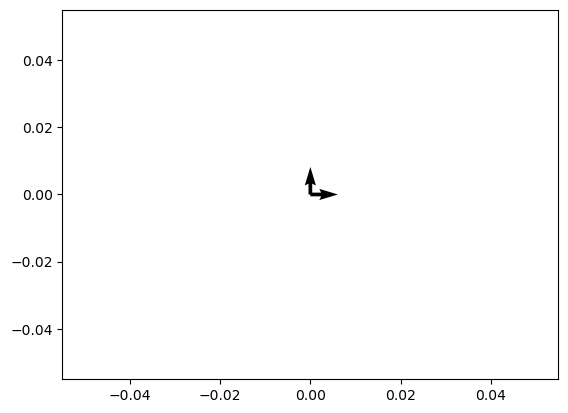

In [80]:
# Creating arrow
x_pos = [0, 0]
y_pos = [0, 0]
x_direct = [1, 0]
y_direct = [0, 1]

plt.quiver(x_pos, y_pos, x_direct, y_direct)